In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('Breast_Cancer_Diagnostic.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
df = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','diagnosis']]
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,M


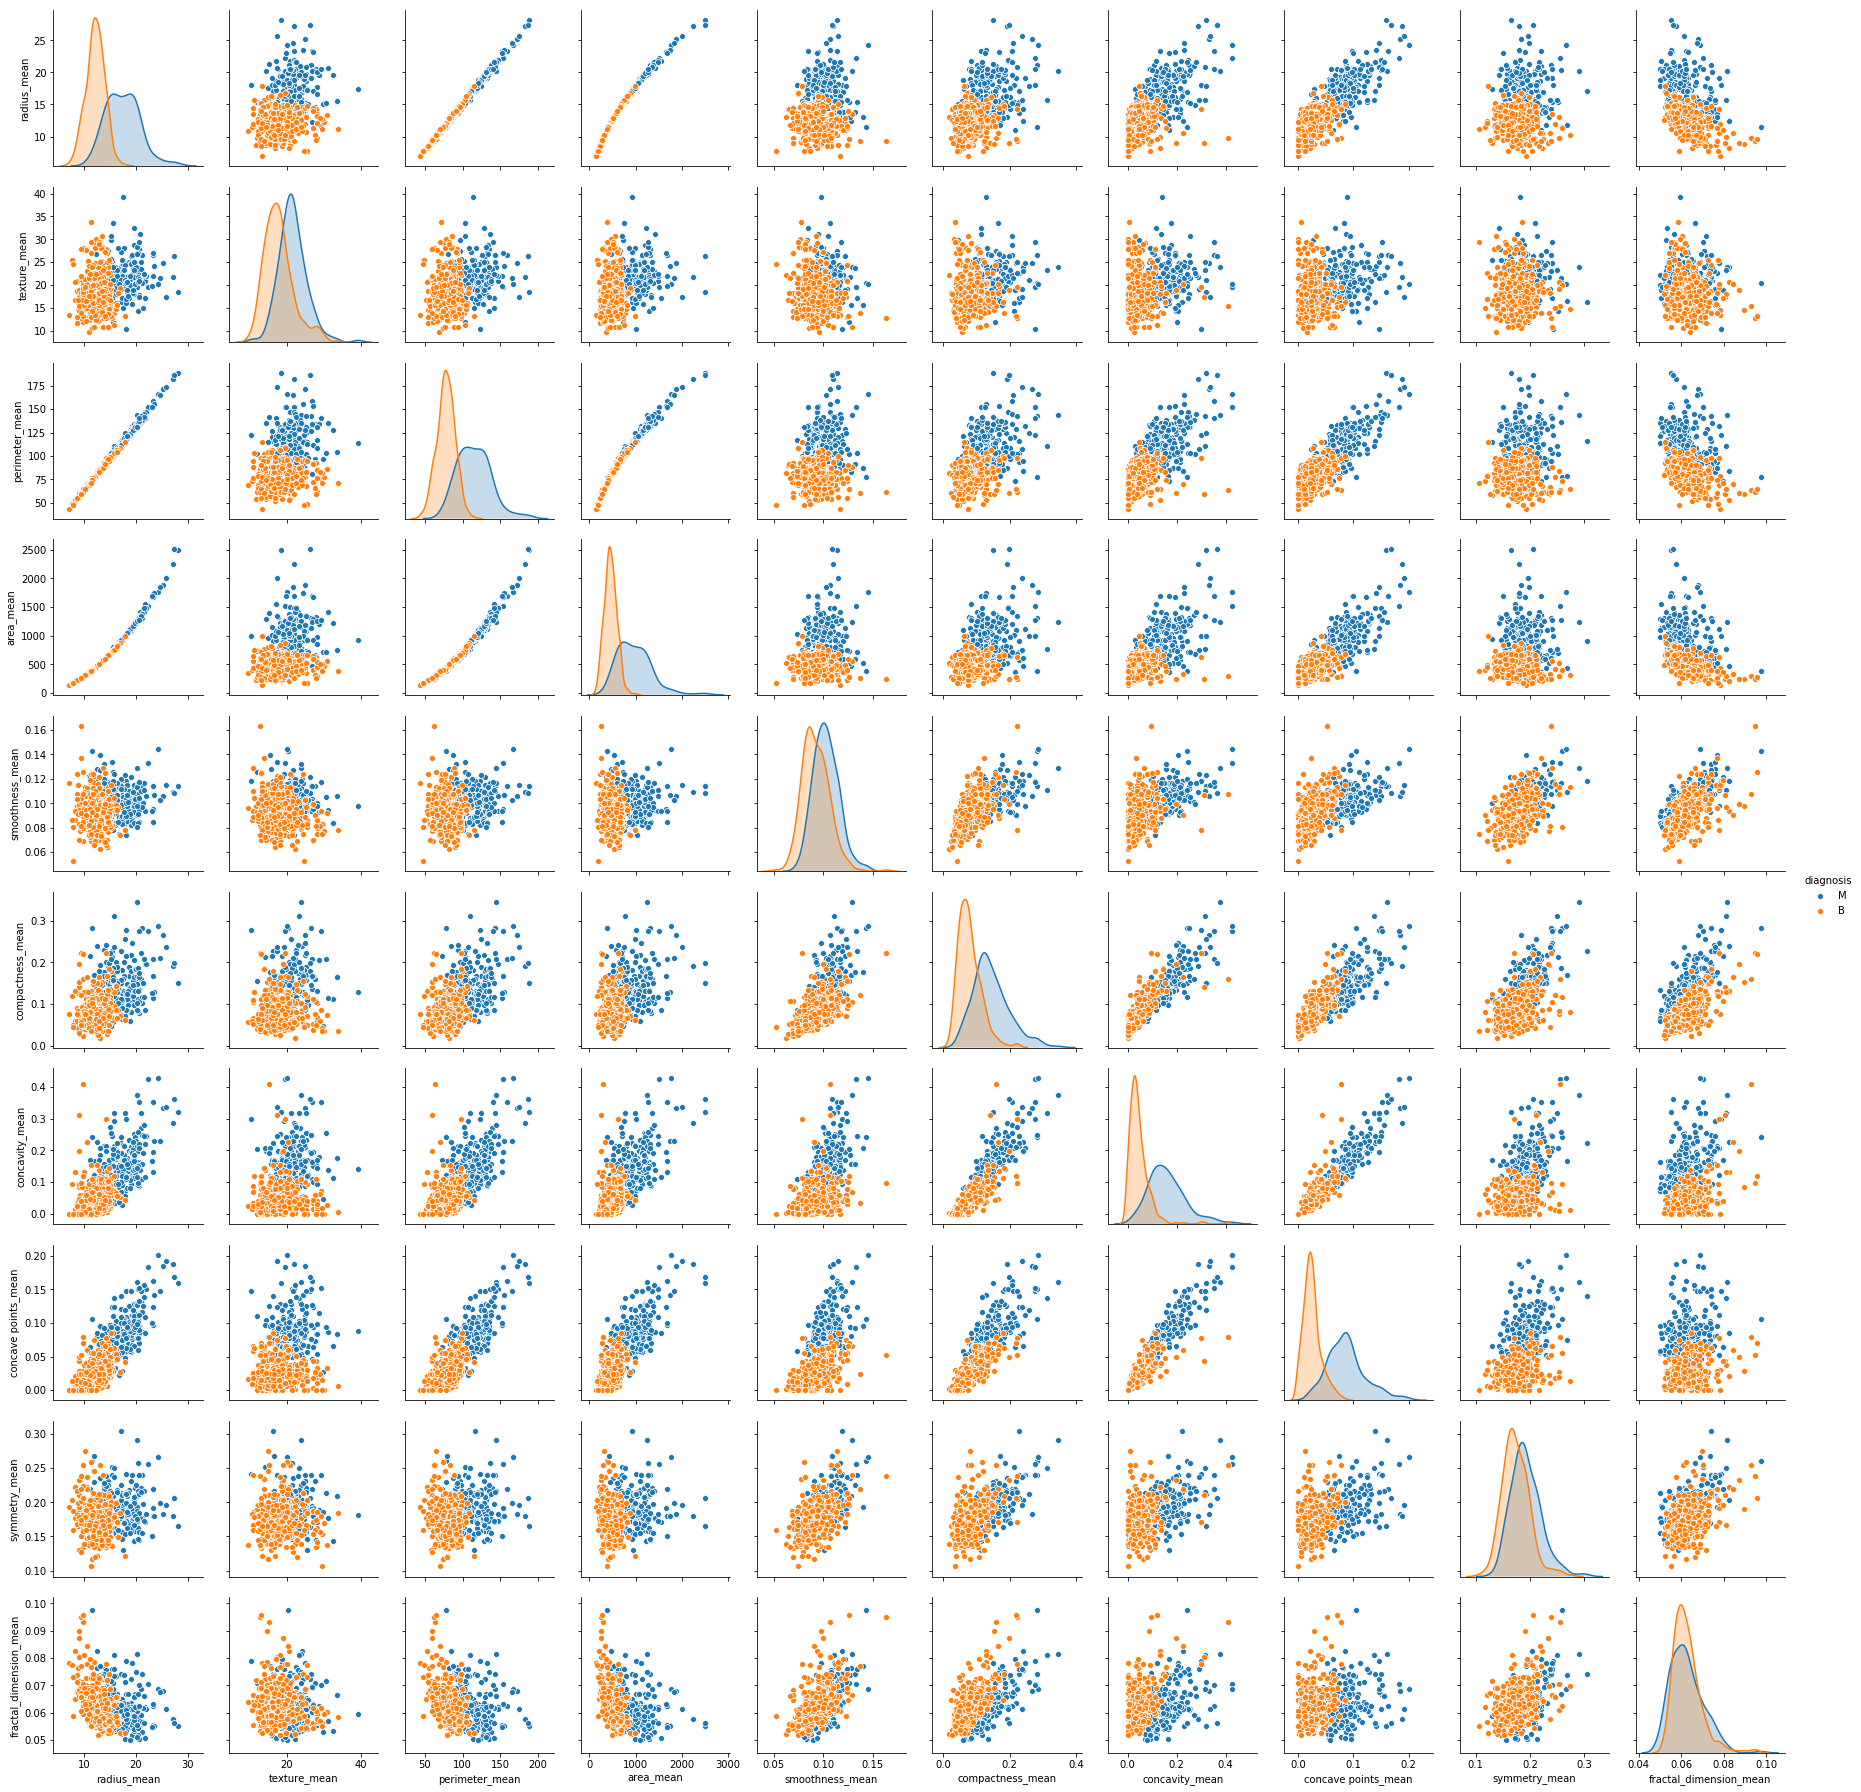

In [5]:
sns.pairplot(df, hue = 'diagnosis')

In [7]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('diagnosis', axis = 1)

In [12]:
y = df['diagnosis']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.30, random_state=42)

In [14]:
from sklearn.svm import SVC

In [15]:
svm_m = SVC()

In [16]:
svm_m.fit(X_train, y_train)

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [18]:
pred = svm_m.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[103   5]
 [ 50  13]]
              precision    recall  f1-score   support

           B       0.67      0.95      0.79       108
           M       0.72      0.21      0.32        63

   micro avg       0.68      0.68      0.68       171
   macro avg       0.70      0.58      0.56       171
weighted avg       0.69      0.68      0.62       171



In [20]:
param_grid = {'C': [0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
grid = GridSearchCV(SVC(), param_grid, verbose = 2)

In [23]:
grid.fit(X_train, y_train)

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[CV] ................................ C=1000, gamma=0.1, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ............................... C=1000, gamma=0.01, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ............................... C=1000, gamma=0.01, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ............................... C=1000, gamma=0.01, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .............................. C=1000, gamma=0.001, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .............................. C=1000, gamma=0.001, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .............................. C=1000, gamma=0.001, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [24]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001}

In [25]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
grid.best_score_

0.8894472361809045

In [27]:
grid_pred = grid.predict(X_test)

In [29]:
print(confusion_matrix(y_test, grid_pred))
print(classification_report(y_test, grid_pred))

[[103   5]
 [ 10  53]]
              precision    recall  f1-score   support

           B       0.91      0.95      0.93       108
           M       0.91      0.84      0.88        63

   micro avg       0.91      0.91      0.91       171
   macro avg       0.91      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171

